## Importing Required Libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Model Performance and Spliting
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as smf

from warnings import filterwarnings
filterwarnings('ignore')

## Creating DataFrame & Data Understanding

In [2]:
# id - Unique ID for each home sold
# date - Date of the home sale
# price - Price of each home sold
# bedrooms - Number of bedrooms
# bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
# sqft_living - Square footage of the apartment interior living space
# sqft_lot - Square footage of the land space
# floors - Number of floors
# waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
# view - An index from 0 to 4 of how good the view of the property was
# condition - An index from 1 to 5 on the condition of the apartment,
# grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.
# sqft_above - The square footage of the interior housing space that is above ground level
# sqft_basement - The square footage of the interior housing space that is below ground level
# yr_built - The year the house was initially built
# yr_renovated - The year of the house’s last renovation
# zipcode - What zipcode area the house is in
# lat - Lattitude
# long - Longitude
# sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head(5)

# id and zipcode columns will be dropped, only unique rows. (FIXED)
# date column will be transformed.                          (FIXED)
# age of the house can be created as a feature (yr_built - date)
# bathrooms and floors have floating point values, must be fixed.
# date feature must be transformed into "datetime" data type and month, day, year features will be created. (FIXED)
# lat and long features represent the house's geo-location must be fixed as a one value or can be dropped (FIXED)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.shape # 21613 rows and 21 columns

(21613, 21)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Data Preprocessing - Feature Engineering - EDA

In [7]:
df.isnull().values.any() # There are missing values.

True

In [8]:
df.duplicated().any() # There is no duplication.

False

In [9]:
df.eq('?').any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [10]:
df['bathrooms'].eq('?').any()

False

In [11]:
df.drop(['id','zipcode','lat','long'], axis=1, inplace=True) #droppping unnecessary features

In [12]:
df['date'] = pd.to_datetime(df['date']) # date column defined as object, transformed it into datetime data type.

### Dealing with Missing Values (If Any)

In [13]:
df.isnull().sum() # 2 rows are missing in sqft_above feature only.

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
percentage_missing = round(df.isnull().sum() * 100 / len(df),4)
missing_value_df = pd.DataFrame({'Missing_Percentage' : percentage_missing})
missing_value_df.sort_values(by='Missing_Percentage', ascending = False).head()
# 0.0093 percent of sqft_above feature are missing.

,Missing_Percentage
sqft_above,0.0093
date,0.0000
condition,0.0000
sqft_living15,0.0000
yr_renovated,0.0000


In [15]:
print("Row count of the dataset before dropping the missing values:", df.shape[0])
df.dropna(subset=['sqft_above'], inplace=True, axis=0) #dropping the missing rows.
print("Row count of the dataset after dropping the missing values:", df.shape[0])

Row count of the dataset before dropping the missing values: 21613
Row count of the dataset after dropping the missing values: 21611


In [16]:
df.isnull().values.any() # No more missing values to deal with.

False

## Feature Engineering

In [17]:
df['date_year'] = df['date'].dt.year #creating date_year feature
df['date_month'] = df['date'].dt.month #creating date_month feature
df['date_day'] = df['date'].dt.day #creating date_day feature

In [18]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year,date_month,date_day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503,2015,2,18


### Creating "season" Feature

In [19]:
df['season'] = ['WINTER' if (i==12) or (i==1) or (i==2)
               else 'SPRING' if (i==3) or (i==4) or (i==5)
               else 'SUMMER' if (i==6) or (i==7) or (i==8)
               else 'AUTUMN' for i in df.date_month]

In [20]:
df['season'].value_counts()

SPRING    6518
SUMMER    6331
AUTUMN    5063
WINTER    3699
Name: season, dtype: int64

### Creating "week" Feature

In [21]:
df['week'] = ['FIRST_WEEK' if (i>=1) and (i<8)
             else 'SECOND_WEEK' if (i>=8) and (i<15)
             else 'THIRD_WEEK' if (i>=15) and (i<22)
             else 'LAST_WEEK' for i in df.date_day]

In [22]:
df['week'].value_counts()

LAST_WEEK      6736
SECOND_WEEK    5095
THIRD_WEEK     4938
FIRST_WEEK     4842
Name: week, dtype: int64

### Creating "building_age" Feature

In [23]:
df['building_age'] = df['date_year'] - df['yr_built'] #calculating the age of the buildings
df['age_after_renovation'] = df['yr_renovated'] - df['yr_built'] #calculating the age of building after renovation.
df['age_after_renovation'] =[0 if i <=0 else i for i in df['age_after_renovation']] # prevents negative values
df['building_age_after_renovation'] = df['building_age'] - df['age_after_renovation'] #building age after renovation
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,date_year,date_month,date_day,season,week,building_age,age_after_renovation,building_age_after_renovation
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1340,5650,2014,10,13,AUTUMN,SECOND_WEEK,59,0,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1690,7639,2014,12,9,WINTER,SECOND_WEEK,63,40,23
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,2720,8062,2015,2,25,WINTER,LAST_WEEK,82,0,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1360,5000,2014,12,9,WINTER,SECOND_WEEK,49,0,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1800,7503,2015,2,18,WINTER,THIRD_WEEK,28,0,28


### Feature Engineering for 'grade' Feature

7     8980
8     6067
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


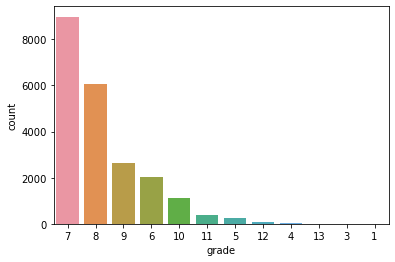

In [24]:
print(df['grade'].value_counts())
df['grade'].value_counts()
sns.countplot(data=df, x='grade',order = df['grade'].value_counts().index);

In [25]:
grades = df['grade'] # Create a series of grade columns
grades_counts = grades.value_counts() #Getting the counts of each grade category
mask = grades.isin(grades_counts[grades_counts < 200].index) #creating a mask
grades[mask] = 'Others'
print(grades.value_counts())

7         8980
8         6067
9         2615
6         2038
10        1134
11         399
5          242
Others     136
Name: grade, dtype: int64


### Feature Engineering for 'condition' Feature

3    14030
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64


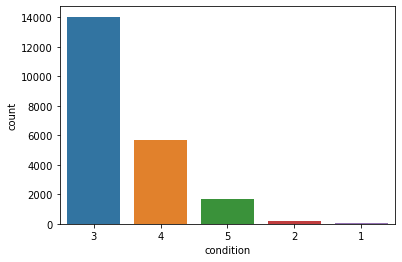

In [26]:
print(df['condition'].value_counts())
df['condition'].value_counts()
sns.countplot(data=df, x='condition',order = df['condition'].value_counts().index);

In [27]:
conditions = df['condition'] # Create a series of grade columns
condition_counts = conditions.value_counts() #Getting the counts of each grade category
mask_condition = conditions.isin(condition_counts[condition_counts < 200].index) #creating a mask
conditions[mask_condition] = 'Others'
print(conditions.value_counts())

3         14030
4          5678
5          1701
Others      202
Name: condition, dtype: int64


### Feature Engineering for 'view' Feature

0    19487
2      963
3      510
1      332
4      319
Name: view, dtype: int64


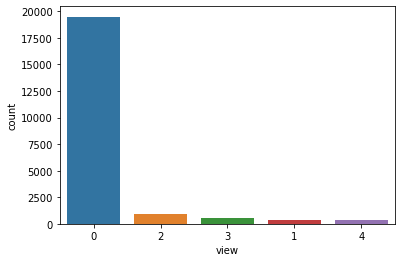

In [28]:
print(df['view'].value_counts())
df['view'].value_counts()
sns.countplot(data=df, x='view',order = df['view'].value_counts().index);

## Exploratory Data Analysis

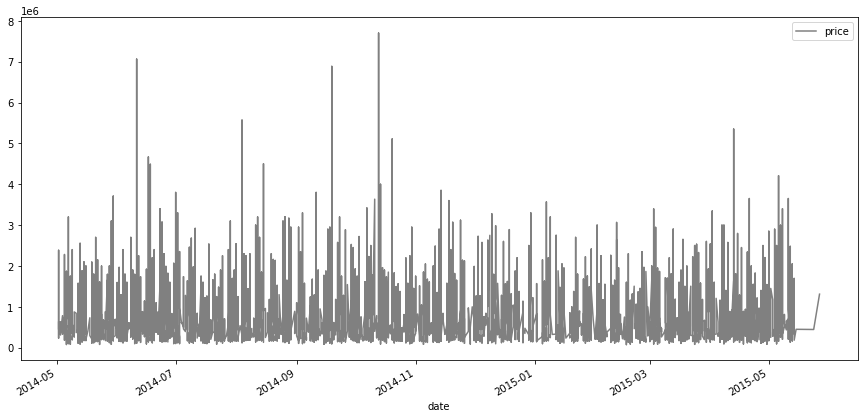

In [29]:
df.plot(x='date', y='price',figsize=(15,7),color='gray')
plt.show()

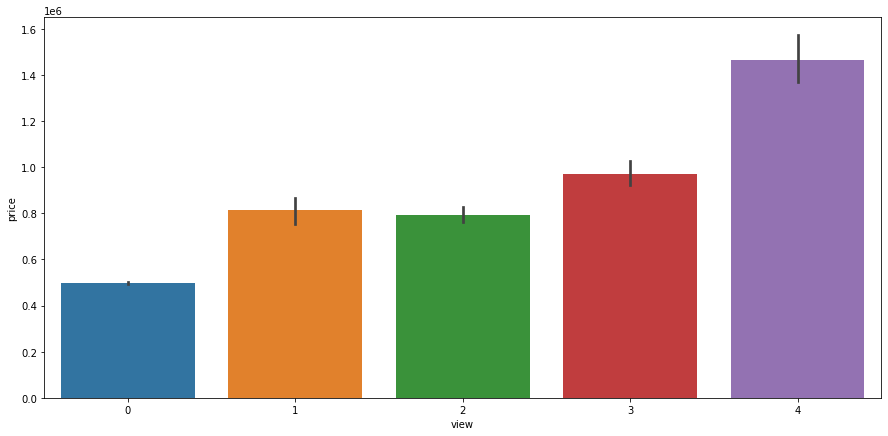

In [30]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x="view", y="price");

### Categorical Variable Analysis

In [31]:
df['view'] = df['view'].astype('object')
df['waterfront'] = df['waterfront'].astype('object')

0    21448
1      163
Name: waterfront, dtype: int64


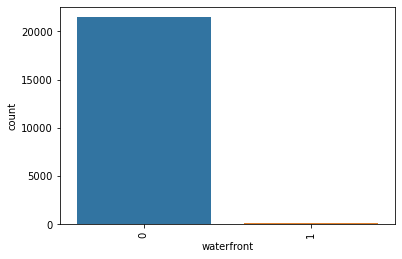

0    19487
2      963
3      510
1      332
4      319
Name: view, dtype: int64


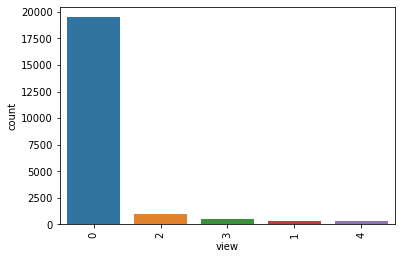

3         14030
4          5678
5          1701
Others      202
Name: condition, dtype: int64


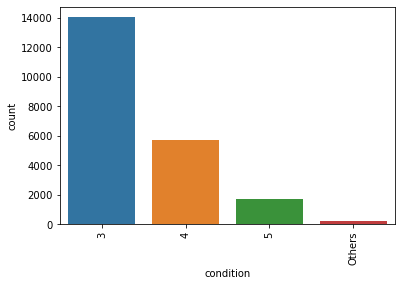

7         8980
8         6067
9         2615
6         2038
10        1134
11         399
5          242
Others     136
Name: grade, dtype: int64


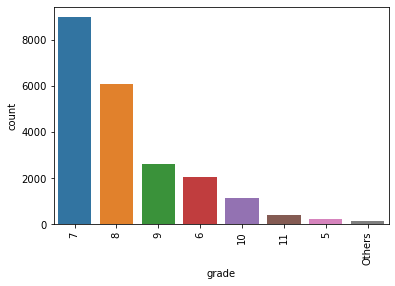

SPRING    6518
SUMMER    6331
AUTUMN    5063
WINTER    3699
Name: season, dtype: int64


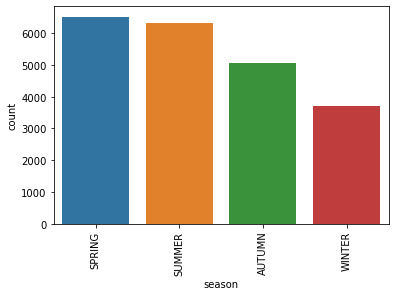

LAST_WEEK      6736
SECOND_WEEK    5095
THIRD_WEEK     4938
FIRST_WEEK     4842
Name: week, dtype: int64


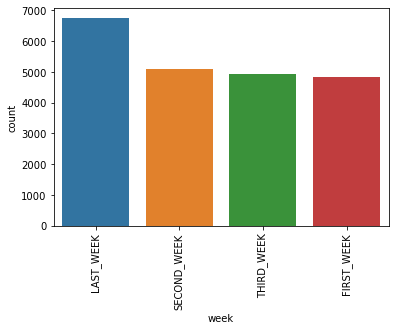

In [32]:
object_variables = df.select_dtypes(include=['object']) #returns a dataframe of "object" dtypes features
for i in object_variables:
    print(object_variables[i].value_counts())
    sns.countplot(x=object_variables[i], order=object_variables[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

### Numeric Variable Analysis

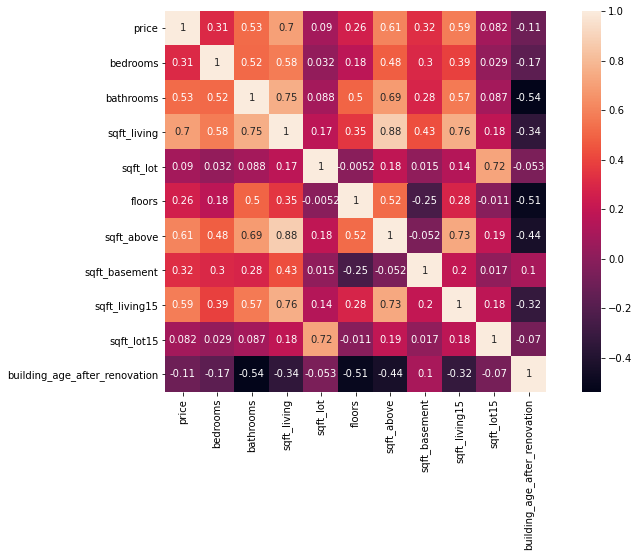

In [33]:
numeric_cols = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above',
               'sqft_basement','sqft_living15','sqft_lot15','building_age_after_renovation']
corr_matrix = df[numeric_cols].corr()
plt.subplots(figsize=(13,7))
sns.heatmap(corr_matrix, annot=True,square=True)
plt.show();

In [34]:
print("The original dataframe has {} columns and {} rows.".format(df.shape[1],df.shape[0]))
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
triange_df = corr_matrix.mask(mask)
to_drop_features = [columns for columns in triange_df if any(triange_df[columns] > 0.7)]
reduced_df = df.drop(to_drop_features, axis=1)
print("The reduced dataframe has {} columns and {} rows.".format(reduced_df.shape[1],reduced_df.shape[0]))

The original dataframe has 25 columns and 21611 rows.
The reduced dataframe has 16 columns and 21611 rows.


### Dropping Unnecessary Features
* date_year, date_month, date_day,building_age, age_after_renovation,yr_built, yr_renovated will be dropped.

In [35]:
reduced_df.head()

,date,bedrooms,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,sqft_lot15,date_month,date_day,season,week,age_after_renovation,building_age_after_renovation
0,2014-10-13,3,1.0,0,0,3,7,0,1340,5650,10,13,AUTUMN,SECOND_WEEK,0,59
1,2014-12-09,3,2.0,0,0,3,7,400,1690,7639,12,9,WINTER,SECOND_WEEK,40,23
2,2015-02-25,2,1.0,0,0,3,6,0,2720,8062,2,25,WINTER,LAST_WEEK,0,82
3,2014-12-09,4,1.0,0,0,5,7,910,1360,5000,12,9,WINTER,SECOND_WEEK,0,49
4,2015-02-18,3,1.0,0,0,3,8,0,1800,7503,2,18,WINTER,THIRD_WEEK,0,28


In [36]:
reduced_df.drop(columns=['date_month', 'date_day','age_after_renovation','date'], axis=1, inplace=True)

In [37]:
reduced_df.head()

,bedrooms,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,sqft_lot15,season,week,building_age_after_renovation
0,3,1.0,0,0,3,7,0,1340,5650,AUTUMN,SECOND_WEEK,59
1,3,2.0,0,0,3,7,400,1690,7639,WINTER,SECOND_WEEK,23
2,2,1.0,0,0,3,6,0,2720,8062,WINTER,LAST_WEEK,82
3,4,1.0,0,0,5,7,910,1360,5000,WINTER,SECOND_WEEK,49
4,3,1.0,0,0,3,8,0,1800,7503,WINTER,THIRD_WEEK,28


In [38]:
df_price = df[['price']]
final_df = pd.concat([reduced_df,df_price],axis=1)
final_df.head()

,bedrooms,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,sqft_lot15,season,week,building_age_after_renovation,price
0,3,1.0,0,0,3,7,0,1340,5650,AUTUMN,SECOND_WEEK,59,221900.0
1,3,2.0,0,0,3,7,400,1690,7639,WINTER,SECOND_WEEK,23,538000.0
2,2,1.0,0,0,3,6,0,2720,8062,WINTER,LAST_WEEK,82,180000.0
3,4,1.0,0,0,5,7,910,1360,5000,WINTER,SECOND_WEEK,49,604000.0
4,3,1.0,0,0,3,8,0,1800,7503,WINTER,THIRD_WEEK,28,510000.0


### One-Hot Encoding

In [39]:
df_one_hot = OneHotEncoder(cols=['season','week','view','condition','grade'],use_cat_names=True).fit_transform(final_df)
df_one_hot.head()

,bedrooms,floors,waterfront,view_0.0,view_3.0,view_4.0,view_2.0,view_1.0,condition_3,condition_5,...,season_AUTUMN,season_WINTER,season_SPRING,season_SUMMER,week_SECOND_WEEK,week_LAST_WEEK,week_THIRD_WEEK,week_FIRST_WEEK,building_age_after_renovation,price
0,3,1.0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,59,221900.0
1,3,2.0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,23,538000.0
2,2,1.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,82,180000.0
3,4,1.0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,49,604000.0
4,3,1.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,28,510000.0


### Scaling Numeric Features

In [40]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df_one_hot[columns].values.reshape(-1,1))

columns_to_be_scaled =['bedrooms','floors','sqft_basement','sqft_living15','sqft_lot15','building_age_after_renovation']

for i in columns_to_be_scaled:
    df_one_hot[i] = scaling(i)
    
df_one_hot.head()

,bedrooms,floors,waterfront,view_0.0,view_3.0,view_4.0,view_2.0,view_1.0,condition_3,condition_5,...,season_AUTUMN,season_WINTER,season_SPRING,season_SUMMER,week_SECOND_WEEK,week_LAST_WEEK,week_THIRD_WEEK,week_FIRST_WEEK,building_age_after_renovation,price
0,0.090909,0.0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.517241,221900.0
1,0.090909,0.4,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0.206897,538000.0
2,0.060606,0.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0.715517,180000.0
3,0.121212,0.0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0.431034,604000.0
4,0.090909,0.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0.250000,510000.0


## Train-Test Split

In [41]:
X = df_one_hot.drop('price', axis=1)
y = df_one_hot['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

### 1 - Linear Regression

In [42]:
linear_model = LinearRegression().fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
r2_test = r2_score(y_test,y_pred)
mse_test = mean_squared_error(y_test,y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

print('R2 Score for Test Set of Linear Regression:', round(r2_test,3))
print('Mean Squared Error for Test Set of Linear Regression:', round(mse_test,3))
print('Root Mean Squared Error for Test Set of Linear Regression:', round(rmse_test,3))

R2 Score for Test Set of Linear Regression: 0.599
Mean Squared Error for Test Set of Linear Regression: 49750314480.433
Root Mean Squared Error for Test Set of Linear Regression: 223047.785


### 2 - Decision Tree Regression

In [44]:
dt_model = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
r2_test_dt = r2_score(y_test, y_pred_dt)
mse_test_dt = mean_squared_error(y_test,y_pred_dt)
rmse_test_dt = np.sqrt(mean_squared_error(y_test,y_pred_dt))

print('R2 Score for Test Set of Decision Tree Regression:', round(r2_test_dt,3))
print('Mean Squared Error for Test Set of Decision Tree Regression:', round(mse_test_dt,3))
print('Root Mean Squared Error for Test Set of Decision Tree Regression:', round(rmse_test_dt,3))

R2 Score for Test Set of Decision Tree Regression: 0.361
Mean Squared Error for Test Set of Decision Tree Regression: 79194648923.627
Root Mean Squared Error for Test Set of Decision Tree Regression: 281415.438


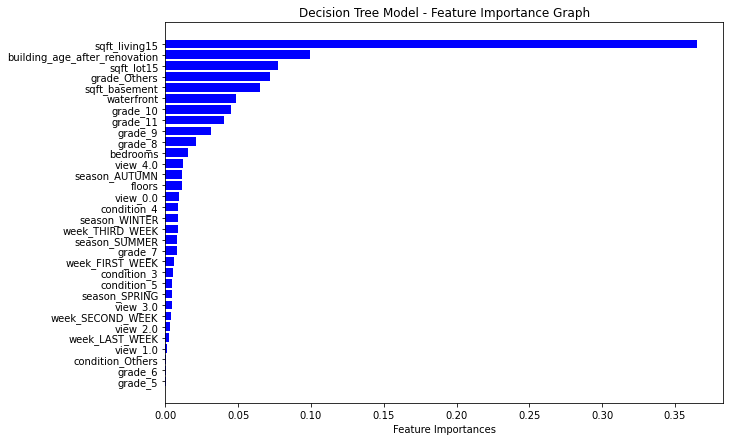

In [64]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)
column_names = list(X_train.columns)

plt.figure(figsize=(10,7))
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.title('Decision Tree Model - Feature Importance Graph')
plt.xlabel('Feature Importances')
plt.show()

### 3 - Random Forest Regression

In [77]:
rf_model = RandomForestRegressor().fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
r2_test_rf = r2_score(y_test, y_pred_rf)
mse_test_rf = mean_squared_error(y_test,y_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))

print('R2 Score for Test Set of Random Forest Regression:', round(r2_test_rf,3))
print('Mean Squared Error for Test Set of Random Forest Regression:', round(mse_test_rf,3))
print('Root Mean Squared Error for Test Set of Random Forest Regression:', round(rmse_test_rf,3))

R2 Score for Test Set of Random Forest Regression: 0.674
Mean Squared Error for Test Set of Random Forest Regression: 40417293613.65
Root Mean Squared Error for Test Set of Random Forest Regression: 201040.527


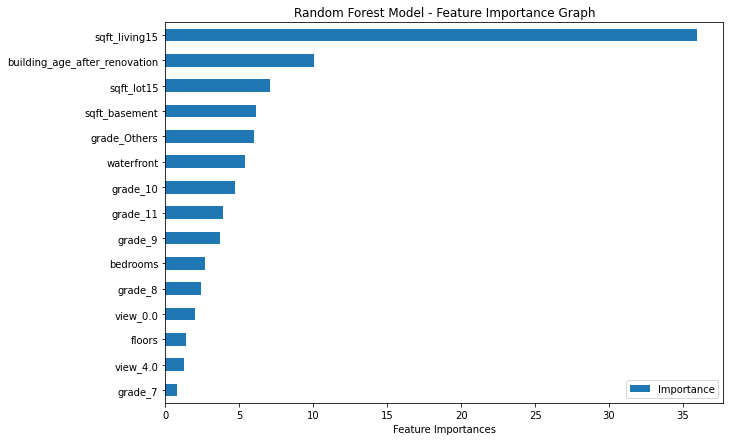

In [74]:
Importance = pd.DataFrame({'Importance':rf_model.feature_importances_*100}, index= X_train.columns)
Importance.nlargest(15, columns='Importance').sort_values(by='Importance', ascending=True).plot(kind='barh',figsize=(10,7))
plt.title('Random Forest Model - Feature Importance Graph')
plt.xlabel('Feature Importances')
plt.show()

### 4 - Gradient Boosting Regression

In [78]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_gbm = gbm_model.predict(X_test)
r2_test_gbm = r2_score(y_test, y_pred_gbm)
mse_test_gbm = mean_squared_error(y_test,y_pred_gbm)
rmse_test_gbm = np.sqrt(mean_squared_error(y_test,y_pred_gbm))

print('R2 Score for Test Set of Gradient Boosting Regression:', round(r2_test_gbm,3))
print('Mean Squared Error for Test Set of Gradient Boosting Regression:', round(mse_test_gbm,3))
print('Root Mean Squared Error for Test Set of Gradient Boosting Regression:', round(rmse_test_gbm,3))

R2 Score for Test Set of Gradient Boosting Regression: 0.639
Mean Squared Error for Test Set of Gradient Boosting Regression: 44754051144.874
Root Mean Squared Error for Test Set of Gradient Boosting Regression: 211551.533


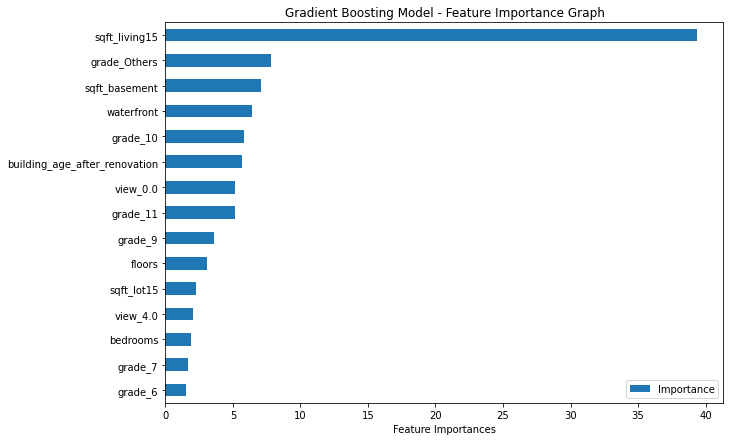

In [79]:
Importance = pd.DataFrame({'Importance':gbm_model.feature_importances_*100}, index= X_train.columns)
Importance.nlargest(15, columns='Importance').sort_values(by='Importance', ascending=True).plot(kind='barh',figsize=(10,7))
plt.title('Gradient Boosting Model - Feature Importance Graph')
plt.xlabel('Feature Importances')
plt.show()

### 5 - Lasso Regression ( L1 )

In [80]:
lasso_model = Lasso().fit(X_train,y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_test_lasso = r2_score(y_test, y_pred_lasso)
mse_test_lasso = mean_squared_error(y_test,y_pred_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test,y_pred_lasso))

print('R2 Score for Test Set of Lasso Regression:', round(r2_test_lasso,3))
print('Mean Squared Error for Test Set of Lasso Regression:', round(mse_test_lasso,3))
print('Root Mean Squared Error for Test Set of Lasso Regression:', round(rmse_test_lasso,3))

R2 Score for Test Set of Lasso Regression: 0.605
Mean Squared Error for Test Set of Lasso Regression: 48977855638.571
Root Mean Squared Error for Test Set of Lasso Regression: 221309.412


In [82]:
import eli5
eli5.show_weights(lasso_model, feature_names = X_train.columns.tolist(),top=10)

### 6 - Ridge Regression ( L2 )

In [83]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_test_ridge = r2_score(y_test, y_pred_ridge)
mse_test_ridge = mean_squared_error(y_test,y_pred_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))

print('R2 Score for Test Set of Lasso Regression:', round(r2_test_ridge,3))
print('Mean Squared Error for Test Set of Lasso Regression:', round(mse_test_ridge,3))
print('Root Mean Squared Error for Test Set of Lasso Regression:', round(rmse_test_ridge,3))

R2 Score for Test Set of Lasso Regression: 0.605
Mean Squared Error for Test Set of Lasso Regression: 48935824905.61
Root Mean Squared Error for Test Set of Lasso Regression: 221214.432


In [84]:
eli5.show_weights(ridge_model, feature_names = X_train.columns.tolist(),top=10)

### 7 - ElasticNet Regression ( L1+L2)

In [85]:
elastic_model = ElasticNet().fit(X_train,y_train)
y_pred_elastic = elastic_model.predict(X_test)
r2_test_elastic = r2_score(y_test, y_pred_elastic)
mse_test_elastic = mean_squared_error(y_test,y_pred_elastic)
rmse_test_elastic = np.sqrt(mean_squared_error(y_test,y_pred_elastic))

print('R2 Score for Test Set of Lasso Regression:', round(r2_test_elastic,3))
print('Mean Squared Error for Test Set of Lasso Regression:', round(mse_test_elastic,3))
print('Root Mean Squared Error for Test Set of Lasso Regression:', round(rmse_test_elastic,3))

R2 Score for Test Set of Lasso Regression: 0.18
Mean Squared Error for Test Set of Lasso Regression: 101619909093.041
Root Mean Squared Error for Test Set of Lasso Regression: 318778.778


### 8 - Ordinary Least Square (OLS) Regression

In [92]:
X_OLS = smf.add_constant(X)
results = smf.OLS(endog=y, exog=X_OLS.astype(float)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1281.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:38:56   Log-Likelihood:            -2.9724e+05
No. Observations:               21611   AIC:                         5.945e+05
Df Residuals:                   21583   BIC:                         5.948e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### 8.1 - Ordinary Least Square (OLS) Regression - STEPWISE

In [95]:
X_OLS_stepwise_1 = X_OLS[["bedrooms"]]
reg_model_ols = smf.OLS(endog=y, exog=X_OLS_stepwise_1.astype(float)).fit()
print(reg_model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                          5.322e+04
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                        22:00:42   Log-Likelihood:                     -3.0660e+05
No. Observations:               21611   AIC:                                  6.132e+05
Df Residuals:                   21610   BIC:                                  6.132e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [96]:
X_OLS_stepwise_2 = X_OLS[["bedrooms","floors"]]
reg_model_ols = smf.OLS(endog=y, exog=X_OLS_stepwise_2.astype(float)).fit()
print(reg_model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.725
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                          2.855e+04
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                        22:01:31   Log-Likelihood:                     -3.0606e+05
No. Observations:               21611   AIC:                                  6.121e+05
Df Residuals:                   21609   BIC:                                  6.121e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [97]:
X_OLS_stepwise_3 = X_OLS[["bedrooms","floors","view_0.0"]]
reg_model_ols = smf.OLS(endog=y, exog=X_OLS_stepwise_3.astype(float)).fit()
print(reg_model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                          2.029e+04
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                        22:02:16   Log-Likelihood:                     -3.0555e+05
No. Observations:               21611   AIC:                                  6.111e+05
Df Residuals:                   21608   BIC:                                  6.111e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 8.1 - Ordinary Least Square (OLS) Regression - FINAL

In [94]:
X_OLS_chosen = X_OLS[["bedrooms","floors","waterfront","sqft_basement","sqft_living15",
                      "sqft_lot15","building_age_after_renovation"]]
reg_model_ols = smf.OLS(endog=y, exog=X_OLS_chosen.astype(float)).fit()
print(reg_model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                          1.530e+04
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                        21:53:07   Log-Likelihood:                     -3.0074e+05
No. Observations:               21611   AIC:                                  6.015e+05
Df Residuals:                   21604   BIC:                                  6.016e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

## Model Comparisons

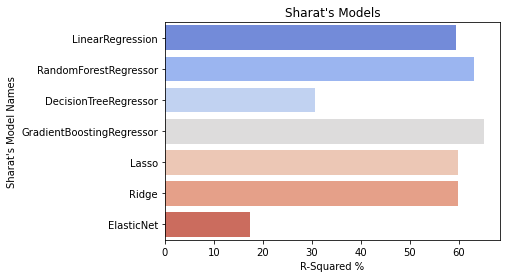

In [101]:
models = [linear_model, rf_model, dt_model, gbm_model, lasso_model, ridge_model, elastic_model]

result_rsquared = []
results_rsquared = pd.DataFrame(columns=["Models", "R-Squared"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    r_squared = cross_val_score(model, X_test, y_test, cv=3, scoring="r2", n_jobs=-1).mean()
    result_rsquared = pd.DataFrame([[names, r_squared*100]], columns=["Models", "R-Squared"])
    results_rsquared = results_rsquared.append(result_rsquared) 

sns.barplot(x='R-Squared', y='Models', data= results_rsquared, palette="coolwarm")
plt.xlabel('R-Squared %')
plt.ylabel("Sharat's Model Names")
plt.title("Sharat's Models", loc="center")
plt.show();

In [105]:
results_rsquared.sort_values(by="R-Squared", ascending=False)

,Models,R-Squared
0,GradientBoostingRegressor,65.146580
0,RandomForestRegressor,63.045742
0,Ridge,59.940822
0,Lasso,59.880836
0,LinearRegression,59.498757
0,DecisionTreeRegressor,30.682908
0,ElasticNet,17.309369


## Model Optimization for The Best Model (Gradient Boosting Regressor)

In [107]:
gbm_params = {'n_estimators':[100,200], 'loss':['ls', 'lad']}


gbm_model_cv = GradientBoostingRegressor()
gbm_model_opt = RandomizedSearchCV(gbm_model_cv, param_distributions= gbm_params, cv=3, n_jobs=-1, n_iter= 1)
gbm_model_opt.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad'],
                                        'n_estimators': [100, 200]})

In [117]:
gbm_model_opt.best_params_

{'n_estimators': 200, 'loss': 'ls'}

In [115]:
# GradientBoostingRegressor(**gbm_model_opt.best_params_)
# gbm_model_opt.best_estimator_

In [119]:
gbm_final_model = GradientBoostingRegressor(n_estimators=200, loss='ls').fit(X_train,y_train)
y_pred_gbm_tuned = gbm_final_model.predict(X_test)
r2_test_gbm_tuned = r2_score(y_test, y_pred_gbm_tuned)
mse_test_gbm_tuned = mean_squared_error(y_test,y_pred_gbm_tuned)
rmse_test_gbm_tuned = np.sqrt(mean_squared_error(y_test,y_pred_gbm_tuned))

print('R2 Score for Test Set of Gradient Boosting Regression(Tuned):', round(r2_test_gbm_tuned,3))
print('Mean Squared Error for Test Set of Gradient Boosting Regression(Tuned):', round(mse_test_gbm_tuned,3))
print('Root Mean Squared Error for Test Set of Gradient Boosting Regression(Tuned):', round(rmse_test_gbm_tuned,3))

R2 Score for Test Set of Gradient Boosting Regression(Tuned): 0.647
Mean Squared Error for Test Set of Gradient Boosting Regression(Tuned): 43745396411.001
Root Mean Squared Error for Test Set of Gradient Boosting Regression(Tuned): 209154.002
